In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from glob import glob
from PIL import Image


import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# Check the installed packages within the current env
!conda list

# packages in environment at /Users/minhhienvo/opt/anaconda3/envs/tensorflow:
#
# Name                    Version                   Build  Channel
absl-py                   0.12.0                   pypi_0    pypi
appnope                   0.1.2           py38hecd8cb5_1001  
argon2-cffi               20.1.0           py38h9ed2024_1  
astunparse                1.6.3                    pypi_0    pypi
async_generator           1.10               pyhd3eb1b0_0  
attrs                     21.2.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
bayesian-optimization     1.2.0                    pypi_0    pypi
blas                      1.0                         mkl  
bleach                    4.0.0              pyhd3eb1b0_0  
boto3                     1.18.21            pyhd3eb1b0_0  
botocore                  1.21.21            pyhd3eb1b0_1  
bottleneck                1.3.2            py38hf1fa96c_1  
brotli                    1.0.9                hb1e83

In [35]:
# Get the data from csv
df_meta = pd.read_csv('data/HAM10000_metadata.csv')

In [37]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [29]:
df_meta.shape


(10015, 7)

In [30]:
df_meta.tail(20)

,lesion_id,image_id,dx,dx_type,age,sex,localization
9995,HAM_0000193,ISIC_0027950,akiec,histo,60.0,female,face
9996,HAM_0006180,ISIC_0027615,akiec,histo,70.0,male,upper extremity
9997,HAM_0006180,ISIC_0028990,akiec,histo,70.0,male,upper extremity
9998,HAM_0004282,ISIC_0033358,akiec,histo,65.0,female,face
9999,HAM_0000356,ISIC_0030655,akiec,histo,60.0,female,face
10000,HAM_0004282,ISIC_0033151,akiec,histo,65.0,female,face
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face
10002,HAM_0006442,ISIC_0032947,akiec,histo,70.0,male,hand
10003,HAM_0004592,ISIC_0029141,akiec,histo,60.0,female,face
10004,HAM_0005579,ISIC_0029309,akiec,histo,80.0,male,face


In [19]:
df_meta.dx_type.value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [20]:
df_meta.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [11]:
df_meta2 = df_meta.drop_duplicates(subset='lesion_id')

In [12]:
len(df_meta2)

7470

In [15]:
df_RGB = pd.read_csv('data/hmnist_28_28_RGB.csv')

In [17]:
df_RGB.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [18]:
df_RGB.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [43]:
#import libraries 
import pandas as pd
import shutil
# Set y as the labels
y = df_meta['dx']
X = df_meta.drop(columns = ['dx'])
#split data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_meta, test_size=0.1, random_state=42, stratify=y)
# Transfer the images into folders, Set the image id as the index
image_index = df_meta.set_index('image_id', inplace=True)
# Get a list of images in each of the two folders
folder_1 = os.listdir('data/HAM10000_images_part_1')
folder_2 = os.listdir('data/HAM10000_images_part_2')
# Get a list of train and val images
train_list = list(df_train['image_id'])
test_list = list(df_test['image_id'])

# Transfer the training images
for image in train_list:
    fname = image + '.jpg'
    if fname in folder_1:
        #the source path
        src = os.path.join('data/HAM10000_images_part_1', fname)
        
        #the destination path
        dst = os.path.join(train_dir+'/'+df['dx'][image], fname)
        print(dst)
        
        shutil.copyfile(src, dst)
    if fname in folder_2:
        #the source path
        src = os.path.join('data/HAM10000_images_part_2', fname)
        #the destination path
        dst = os.path.join(train_dir, fname)
        
        shutil.copyfile(src, dst)
        
# Transfer the validation images
for image in test_list:
    fname = image + '.jpg'
    if fname in folder_1:
        #the source path
        src = os.path.join('data/HAM10000_images_part_1', fname)
        #the destination path
        dst = os.path.join(val_dir+'/'+df['dx'][image], fname)
       
        shutil.copyfile(src, dst)
       
    if fname in folder_2:
        #the source path
        src = os.path.join('data/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        y_valid.append(df['dx'][image])
# Check how many training images are in train_dir
print(len(os.listdir('base_dir/train_dir')))
print(len(os.listdir('base_dir/val_dir')))
# Check how many validation images are in val_dir
print(len(os.listdir('data/HAM10000_images_part_1')))
print(len(os.listdir('data/HAM10000_images_part_2')))

NameError: name 'train_dir' is not defined

In [ ]:
#y = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in df.dx]


In [41]:
#Solving duplications

def identify_duplicates(x):
    
    unique_list = list(df_meta['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_meta['duplicates'] = df_meta['lesion_id']
# apply the function to this new column
df_meta['duplicates'] = df_meta['duplicates'].apply(identify_duplicates)

df_meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,no_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,no_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,no_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,no_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,no_duplicates


In [ ]:
#--------------image generator---------------
from keras.preprocessing.image import ImageDataGenerator
import keras 
print(df.head())
image_class = ['nv','mel','bkl','bcc','akiec','vasc','df']
train_path = 'base_dir/train_dir/'
valid_path = 'base_dir/val_dir/'
print(os.listdir('base_dir/train_dir'))
print(len(os.listdir('base_dir/val_dir')))
image_shape = 224
train_datagen  = ImageDataGenerator(rescale=1./255)
val_datagen  = ImageDataGenerator(rescale=1./255)
#declares data generator for train and val batches
train_batches = train_datagen.flow_from_directory(train_path, 
                                                        target_size = (image_shape,image_shape),
                                                        classes = image_class,
                                                        batch_size = 64
                                                        )
valid_batches = val_datagen.flow_from_directory(valid_path, 
                                                        target_size = (image_shape,image_shape),
                                                        classes = image_class,
                                                        batch_size = 64                                                      )

In [ ]:
#-------------------------------modelling------------------------------
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten 
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
mobile = keras.applications.mobilenet.MobileNet()
x = mobile.layers[-6].output
# Add a dropout and dense layer for predictions
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)
print(mobile.input)
net = Model(inputs=mobile.input, outputs=predictions)
mobile.summary()
for layer in net.layers[:-23]:
  layer.trainable = False
net.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
history = net.fit_generator(train_batches, epochs=10)

<AxesSubplot:>

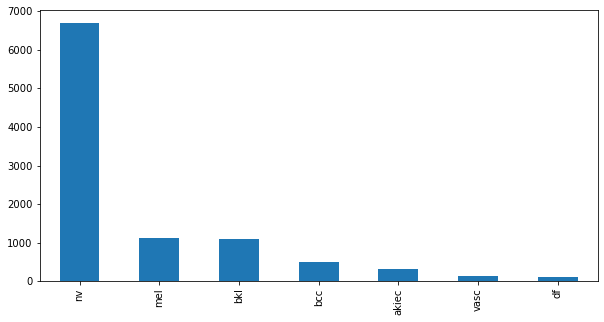

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df_meta['dx'].value_counts().plot(kind='bar', ax=ax1)

<AxesSubplot:>

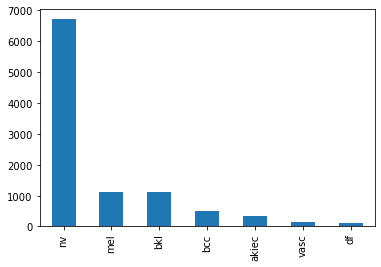

In [45]:
df_meta['dx'].value_counts().plot(kind='bar')


<AxesSubplot:>

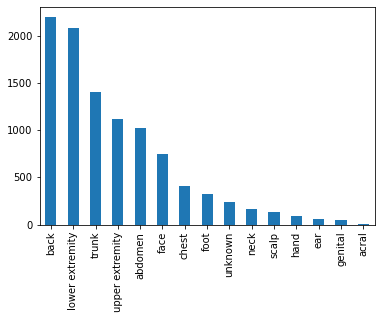

In [46]:
df_meta['localization'].value_counts().plot(kind='bar')

<AxesSubplot:>

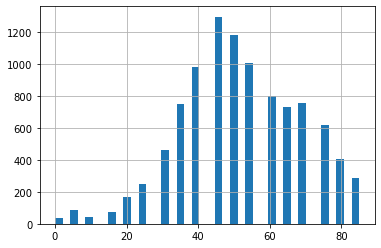

In [47]:
df_meta['age'].hist(bins=40)

<AxesSubplot:>

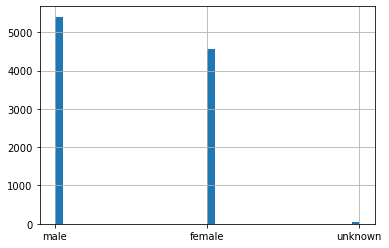

In [48]:
df_meta['sex'].hist(bins=40)

In [ ]:
#STEP X: Model Building

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

In [ ]:
#Data Augmentation
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)